# Kolmogorov Flow Study


In [1]:
import numpy as np
import torch 
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
import pickle
import re

latex_textwidth_in_inches = 6.5  # change as needed
px_width = latex_textwidth_in_inches * 96
template = "simple_white"
font=dict(family="Times New Roman", size=11)
default_colors = px.colors.qualitative.T10
figure_path = r"C:\Users\Noahc\Documents\USYD\PHD\4 - Latex_new\00_figures\06_mno\kf"

In [2]:
import sys
sys.path.insert(0, r'C:\Users\Noahc\Documents\USYD\PHD\8 - Github\Rev909')
from utilities import PCA, w_to_u

In [3]:
# For 3D PCA scatter plots
pca_scene_dict = {'aspectmode':"manual", 
              'aspectratio':{'x':1,'y':1,'z':1.5},
              'xaxis':{'title':"1st PC"},
              'yaxis':{'title':"2nd PC"},
              'zaxis':{'title':"t"},}
pca_scene_camera = {'projection':{'type':"orthographic"},
                'up':{'x':0,'y':0,'z':1},
                'eye':{'x':0.5,'y':0.5,'z':0.5},
                'center':{'x':0.1,'y':0,'z':-0.1}
    }

## $Re=500$

In [114]:
re500_path = r"C:\Users\Noahc\Documents\USYD\PHD\0 - Work Space\Markov Studies\2D_NS_Re500.npy"
#re500_path = r"C:/Users/Noahc/Documents/USYD/PHD/0 - Work Space/Markov Studies v2/2D_NS_Re500_sample.npy"
dataset = np.load(re500_path)[-100:,...]
print(f'Dataset has shape {dataset.shape}')
out_dim = 1
S = 64
dataset_reshape = dataset[:,100:,...].reshape(-1,S,S)

#max_norm = np.linalg.norm(dataset[:,100:,...], axis=(2, 3)).max()
max_norm = 270.7950466198188

Dataset has shape (100, 501, 64, 64)


models:

In [5]:
models = {'Dataset':{'data': torch.tensor(dataset_reshape)},
          'Spectral_H0':{'wandb_name': "floral-sweep-7"},
          'Spectral_H1':{'wandb_name': "flowing-sweep-8"},
          'Spectral_H2':{'wandb_name': "peachy-sweep-9"},
          'Spectral_H0_reg':{'wandb_name': "fine-sweep-1"},
          'Spectral_H1_reg':{'wandb_name': "treasured-sweep-2"},
          'Spectral_H2_reg':{'wandb_name': "worthy-sweep-3"},
          'FVM_H0':{'wandb_name': "rich-sweep-10"},
          'FVM_H1':{'wandb_name': "quiet-sweep-11"},
          'FVM_H2':{'wandb_name': "denim-sweep-12"},
          'FVM_H0_reg':{'wandb_name': "peach-sweep-4"},
          'FVM_H1_reg':{'wandb_name': "soft-sweep-5"},
          'FVM_H2_reg':{'wandb_name': "leafy-sweep-6"},
          }

sweep_path1 = r'C:\Users\Noahc\Documents\USYD\PHD\8 - Github\Rev909\results\ACFR'
for key,__ in models.items():
    models[key]['name'] = re.sub(r"H([0-2])", r"H<sub>\1</sub>", key).replace("_"," ")

In [7]:
import os
from pathlib import Path
def fetch_results_path(models, level1_path=None, dictkey='wandb_name'):
    if level1_path is None:
        level1_path = os.getcwd()
        print(f'Searching for model exports in {level1_path}')
    level1_path = Path(level1_path)
    
    for key, value in models.items():
        if key == 'Dataset': continue
        run_path = None
        #wandb_name = value[dictkey].copy()

        for folder in level1_path.iterdir():
            if folder.is_dir() and folder.name.startswith(value[dictkey]):
                run_path = folder
                break
        
        if run_path is None:
            for level2_path in level1_path.iterdir():
                level2_path = Path(level2_path)
                if level2_path.is_dir():
                    for folder in level2_path.iterdir():
                        if folder.is_dir() and folder.name.startswith(value[dictkey]):
                            run_path = folder
                            break
        
        if run_path is None:
            print(f'{key} not found :(')
        else:
            models[key]['run_path'] = run_path
            print(f'{key} found at {run_path}')

fetch long rollout

In [8]:
solution_filename = 'long_rollout_10000.npy.npy'
fetch_results_path(models, level1_path=sweep_path1)
for key, value in models.items():
    try:
        models[key]['data'] = torch.tensor(np.load(f'{value["run_path"]}/{solution_filename}'))
        T = models[key]["data"].shape[0] # set T for total study
        print(f'{key} has solution size {models[key]["data"].shape}')
    except:
        print(f'{key} has no solution path')

Spectral_H0 found at C:\Users\Noahc\Documents\USYD\PHD\8 - Github\Rev909\results\ACFR\SWEEP-orp8jrpj\floral-sweep-7-nk6as74g
Spectral_H1 found at C:\Users\Noahc\Documents\USYD\PHD\8 - Github\Rev909\results\ACFR\SWEEP-orp8jrpj\flowing-sweep-8-4xk9yqej
Spectral_H2 found at C:\Users\Noahc\Documents\USYD\PHD\8 - Github\Rev909\results\ACFR\SWEEP-orp8jrpj\peachy-sweep-9-0r102w1q
Spectral_H0_reg found at C:\Users\Noahc\Documents\USYD\PHD\8 - Github\Rev909\results\ACFR\SWEEP-orp8jrpj\fine-sweep-1-wy3zap0c
Spectral_H1_reg found at C:\Users\Noahc\Documents\USYD\PHD\8 - Github\Rev909\results\ACFR\SWEEP-orp8jrpj\treasured-sweep-2-jfl4cgjh
Spectral_H2_reg found at C:\Users\Noahc\Documents\USYD\PHD\8 - Github\Rev909\results\ACFR\SWEEP-orp8jrpj\worthy-sweep-3-i5dmqdwk
FVM_H0 found at C:\Users\Noahc\Documents\USYD\PHD\8 - Github\Rev909\results\ACFR\SWEEP-orp8jrpj\rich-sweep-10-mjfv15zk
FVM_H1 found at C:\Users\Noahc\Documents\USYD\PHD\8 - Github\Rev909\results\ACFR\SWEEP-orp8jrpj\quiet-sweep-11-o11pa8

### PCA Statistics

In [9]:
use_preloaded_encoding = False
save_new_encoding = True
encoding_folder = r'C:\Users\Noahc\Documents\USYD\PHD\8 - Github\Rev909\data'

PCA_dim = 50
if use_preloaded_encoding:
    with open(f"{encoding_folder}/x_pca_kf_re500.pkl", "rb") as f:
        x_pca = pickle.load(f)
else:
    x_pca = PCA(torch.tensor(dataset).reshape(-1, 64*64), PCA_dim, subtract_mean=False)
    if save_new_encoding:
        with open(f"{encoding_folder}/x_pca_kf_re500.pkl", "wb") as f:
            pickle.dump(x_pca, f)

In [10]:
#T = 10000
for key, value in models.items():
    models[key]['pca_encoding'] = x_pca.encode(value['data'].reshape(-1, 64*64))[:T]

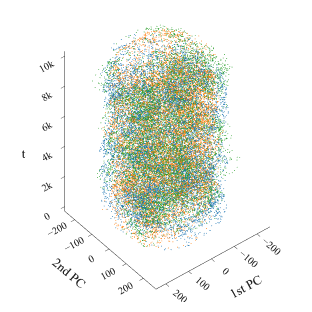

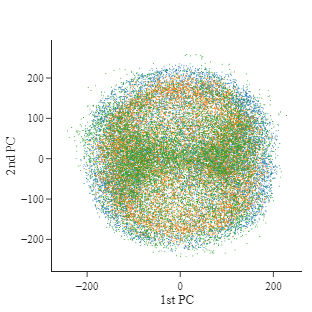

In [88]:
fig_3d = go.Figure()
fig_2d = go.Figure()
n_T = 10000

show_model_list = ['Dataset', 'FVM_H2_reg', 'Spectral_H2_reg']
names = ['Dataset', 'Spectral', 'FVM']
for i, key in enumerate(show_model_list):
    #if key not in show_model_list: continue
    fig_3d.add_trace(go.Scatter3d(x=models[key]['pca_encoding'][:n_T, 0], 
                               y=models[key]['pca_encoding'][:n_T, 1], 
                               z=np.arange(n_T), 
                               name=names[i], legendgroup=names[i],
                               mode='markers', marker=dict(size=0.5)
                               ))
    fig_2d.add_trace(go.Scatter(x=models[key]['pca_encoding'][:n_T, 0], 
                               y=models[key]['pca_encoding'][:n_T, 1], 
                               #z=np.arange(n_T), 
                               name=names[i], legendgroup=names[i],
                               mode='markers', marker=dict(size=1)
                               ))
fig_3d.update_layout(
    font=font, template=template, plot_bgcolor='rgba(0,0,0,0)', showlegend=False,
    width=px_width/2, height = px_width/2, margin=dict(l=0, r=0, t=10, b=10),
    scene=pca_scene_dict, scene_camera=pca_scene_camera
)
fig_2d.update_layout(
    font=font, template=template, plot_bgcolor='rgba(0,0,0,0)', showlegend=False,
    width=px_width/2, height = px_width/2, margin=dict(l=10, r=10, t=40, b=10),
    xaxis={'title_text':"1st PC", 'title_standoff':1}, 
    yaxis={'title_text':"2nd PC", 'title_standoff':1},
    legend=dict(
        itemsizing="constant",   # keep legend markers same size as trace
        x=0.5, y=1,
        xanchor="center", yanchor="top",
        #xref="container",
        yref="container",
        orientation='h', tracegroupgap=0,
        bgcolor="rgba(255,255,255,0)",
        entrywidth=0.3, # change it to 0.3
        entrywidthmode='fraction',
    )
)
fig_3d.show(renderer="png")
fig_2d.show(renderer="png")

In [89]:
fig_3d.write_image(f"{figure_path}/MNO_KF500_PCA_3D_reg.pdf")
fig_2d.write_image(f"{figure_path}/MNO_KF500_PCA_2D_reg.pdf")

Now lets plot the dissipation regularizer:

### Vorticity distribution

In [83]:
from scipy.stats import gaussian_kde
n_bins = 50
for key, value in models.items():
    kde_data = gaussian_kde(value['data'].reshape(-1)[np.random.permutation(len(value['data'].reshape(-1)))[:T]],
                            bw_method='scott')
    bins_data = np.linspace(value['data'].reshape(-1).min(), value['data'].reshape(-1).max(), n_bins)
    bins_data = np.linspace(-3, 3, n_bins)
    models[key]['vorticity_dist'] = kde_data.evaluate(bins_data)
    models[key]['vorticity_bins'] = bins_data

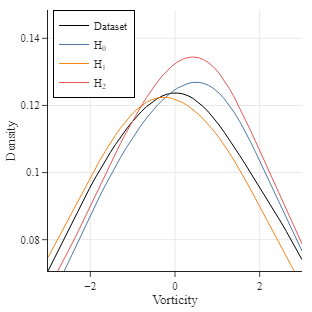

In [98]:
fig = go.Figure()
type = 'Spectral'
show_model_list = ['Dataset', f'{type}_H0_reg', f'{type}_H1_reg', f'{type}_H2_reg']
colors = ['Black', default_colors[0], default_colors[1], default_colors[2]]
names = ['Dataset', 'H<sub>0</sub>', 'H<sub>1</sub>', 'H<sub>2</sub>']
#i = 0
#for __, (key, value) in enumerate(models.items()):
    #if key not in show_model_list: continue
for i, key in enumerate(show_model_list):
    fig.add_trace(go.Scatter(x=models[key]['vorticity_bins'],
                             y=models[key]['vorticity_dist'],
                             name=names[i], legendgroup=names[i],
                             mode='lines', line=dict(width=1, color=colors[i])
                             ))
    #i+=1
fig.update_layout(
    font=font, template=template, plot_bgcolor='rgba(0,0,0,0)', showlegend=True if type == 'Spectral' else False,
    width=px_width/2, height = px_width/2, margin=dict(l=10, r=10, t=10, b=10),
    xaxis={'title_text':"Vorticity", 'title_standoff':1, 'showgrid':True, 
           'range':[models['Dataset']['vorticity_bins'].min(), models['Dataset']['vorticity_bins'].max()]}, 
    yaxis={'title_text':"Density", 'title_standoff':1, 'showgrid':True,
           'range':[models['Dataset']['vorticity_dist'].min(), models['Dataset']['vorticity_dist'].max()*1.2]},
    legend=dict(
        #itemsizing="constant",   # keep legend markers same size as trace
        x=0.02, y=1,
        xanchor="left", yanchor="top",
        orientation='v', tracegroupgap=0,
        bgcolor="rgba(255,255,255,1)",
        bordercolor="black",
        borderwidth=1
    )
)
fig.show(renderer="png")

fig.write_image(f"{figure_path}/MNO_KF500_vorticity_{type}.pdf")

In [96]:
f"{figure_path}/MNO_KF500_vorticity_{type}.pdf"

'C:\\Users\\Noahc\\Documents\\USYD\\PHD\\4 - Latex_new\\00_figures\\06_mno\\kf/MNO_KF500_vorticity_FVM.pdf'

### Energy Spectrum

In [85]:
def spectrum2(u, s):
    T = u.shape[0]
    u = u.reshape(T, s, s)
    u = torch.fft.fft2(u)

    # 2d wavenumbers following Pytorch fft convention
    k_max = s // 2
    wavenumers = torch.cat((torch.arange(start=0, end=k_max, step=1), \
                            torch.arange(start=-k_max, end=0, step=1)), 0).repeat(s, 1)
    k_x = wavenumers.transpose(0, 1)
    k_y = wavenumers
    
    # Sum wavenumbers
    sum_k = torch.abs(k_x) + torch.abs(k_y)
    sum_k = sum_k.numpy()
    
    # Remove symmetric components from wavenumbers
    index = -1.0 * np.ones((s, s))
    index[0:k_max + 1, 0:k_max + 1] = sum_k[0:k_max + 1, 0:k_max + 1]

    spectrum = np.zeros((T, s))
    for j in range(1, s + 1):
        ind = np.where(index == j)
        spectrum[:, j - 1] = np.sqrt( (u[:, ind[0], ind[1]].sum(axis=1)).abs() ** 2)
        
    spectrum = spectrum.mean(axis=0)
    return spectrum

In [86]:
for key, value in models.items():
    models[key]['spectrum'] = spectrum2(value['data'][:1000,...].reshape(-1,S,S), S)[:S//2]

In [100]:
fig = go.Figure()

type = 'FVM'
show_model_list = ['Dataset', f'{type}_H0_reg', f'{type}_H1_reg', f'{type}_H2_reg']
colors = ['Black', default_colors[0], default_colors[1], default_colors[2]]
names = ['Dataset', 'H<sub>0</sub>', 'H<sub>1</sub>', 'H<sub>2</sub>']

for i, key in enumerate(show_model_list):
    fig.add_trace(go.Scatter(y=models[key]['spectrum'],
                             name=names[i], legendgroup=names[i],
                             mode='lines', line=dict(width=1, color=colors[i])
                             ))
fig.update_layout(
    font=font, template=template, plot_bgcolor='rgba(0,0,0,0)', showlegend=True if type == 'Spectral' else False,
    width=px_width/2, height = px_width/2, margin=dict(l=10, r=10, t=10, b=10),
    xaxis={'title_text':"Wavenumber", 'title_standoff':1, 'showgrid':False}, 
    yaxis={'title_text':"Energy", 'title_standoff':1, 'type':"log", 'showgrid':True},
    legend=dict(
        #itemsizing="constant",   # keep legend markers same size as trace
        x=0.98, y=0.98,
        xanchor="right", yanchor="top",
        orientation='v', tracegroupgap=0,
        bgcolor="rgba(255,255,255,1)",
        bordercolor="black",
        borderwidth=1
    )
)
fig.show()

fig.write_image(f"{figure_path}/MNO_KF500_KE_{type}.pdf")

### Rollout Visualization

In [115]:
B, T, S, _ = dataset.shape
B = 1000
ntrain = int(0.9*B)
ntest = B - ntrain
rollout_idx = -ntest+1 

rollout_idx = 1
#1000 - 99

In [122]:
import plotly.subplots as subplots
rows=3
cols=5
fig = subplots.make_subplots(rows,cols,vertical_spacing=0.01,horizontal_spacing=0.01, 
                             #row_titles=['Dataset', 'Spectral', 'FDM', 'FVM'],
                             column_titles=['t = 100', 't = 200', 't = 300', 't = 400', 't = 500'])
#fig.add_trace(go.Heatmap(z=du_fvm['dwdx'][0,...,0], showscale=False),1,1)

for i, type in enumerate(['Dataset', 'Spectral', 'FVM']):
    for j, time_step in enumerate([100,200,300,400,500]):
        if type == 'Dataset':
            data = dataset[rollout_idx,100:,...]
        else:
            data = models[f'{type}_H2_reg']['data'][...,0]

        fig.add_trace(go.Heatmap(z=data[time_step-100,...], showscale=False, coloraxis='coloraxis1', zsmooth='fast'),i+1,j+1)


#fig.add_trace(go.Heatmap(z=first_soblev[0,...,0].real, showscale=False),1,3)
for i in range(1, rows*cols + 1):
    fig.update_xaxes(scaleanchor=f"y{i}", ticks='', scaleratio=1, linecolor='rgba(0,0,0,0)', showgrid=False, showticklabels=False, row=(i-1)//cols + 1, col=(i-1)%cols + 1)
    fig.update_yaxes(constrain='domain', ticks='', linecolor='rgba(0,0,0,0)', showgrid=False, showticklabels=False, row=(i-1)//cols + 1, col=(i-1)%cols + 1)
fig.update_layout(
    font=dict(family="Times New Roman", size=11), template = "simple_white",
    #xaxis=dict(showticklabels=True, showgrid=True, zeroline=False, linecolor='rgba(0,0,0,0)', title='Angle', scaleanchor='y', scaleratio=1.5, title_standoff=0),
    #yaxis=dict(showticklabels=True, showgrid=True, zeroline=False, linecolor='rgba(0,0,0,0)', title='Radius'),
    #plot_bgcolor='rgba(0,0,0,0)',    # Background color inside the plot area
    width=px_width*1, showlegend=False, margin=dict(l=60, r=10, t=20, b=10), height = px_width*0.6, 
    coloraxis1=dict(colorscale='IceFire', showscale=False),
)
# for ann in fig['layout']['annotations']:
#     ann['y'] -= 0.03  # reduce y offset (smaller -> closer)
for i, t in enumerate(['Dataset', 'Spectral', 'FVM']):
    fig.add_annotation(
        text=t,
        x=-0.06,           # slightly left of the axis
        y=S/2,    # evenly spaced from bottom (0) to top (1)
        xref='paper',xanchor='center',
        yref=f'y{cols*i+1}',
        showarrow=False,
        textangle=0,
        font=dict(size=14)
    )

# for i in range(len(fig.layout.annotations)):
#    fig.layout.annotations[i].y = 0.93  # Adjust y coordinate closer to plot
fig.show()
fig.write_image(f"{figure_path}/MNO_KF500_rollout_timesteps.pdf")